# SY-SY5Y

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports data structuring

In [3]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# CNN template import

In [4]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Documents from different files will be stored in this directory

In [5]:
diretorio = '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> lista_img_camp_clar_100_resized_regressao_SH_SY5Y2022-10-25.gz
1 -> lista_rotulo_camp_clar_100_resized_regressao_SH_SY5Y2022-10-25.gz
2 -> lista_img_camp_clar_75_resized_regressao_SH_SY5Y2022-10-25.gz
3 -> lista_rotulo_camp_clar_75_resized_regressao_SH_SY5Y2022-10-25.gz
4 -> lista_img_camp_clar_50_resized_regressao_SH_SY5Y2022-10-25.gz
5 -> lista_rotulo_camp_clar_50_resized_regressao_SH_SY5Y2022-10-25.gz
6 -> lista_img_camp_clar_25_resized_regressao_SH_SY5Y2022-10-25.gz
7 -> lista_rotulo_camp_clar_25_resized_regressao_SH_SY5Y2022-10-25.gz


Lists of all images in each file

In [6]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados):
    if k in [0,2,4,6]:
        print(f'{k} -> {v}')

0 -> lista_img_camp_clar_100_resized_regressao_SH_SY5Y2022-10-25.gz
2 -> lista_img_camp_clar_75_resized_regressao_SH_SY5Y2022-10-25.gz
4 -> lista_img_camp_clar_50_resized_regressao_SH_SY5Y2022-10-25.gz
6 -> lista_img_camp_clar_25_resized_regressao_SH_SY5Y2022-10-25.gz


## x = features/images

In [7]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[0])

# 12 -> 00-lista_img_dapi_crop_75_resized_2021-5-12.gz
X_setcin = joblib.load(diretorio+ '/' + lista_dados[2])

# 10 -> 00-lista_img_dapi_crop_50_resized_2021-5-12.gz
X_cinq = joblib.load(diretorio+ '/' + lista_dados[4])

# 8 -> 00-lista_img_dapi_crop_25_resized_2021-5-12.gz
X_vincin = joblib.load(diretorio+ '/' + lista_dados[6])

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin))

x.shape

(1168, 200, 200, 3)

## y = labels

Opening the labels that were saved in the preparation of the images

In [8]:
for k, v in enumerate(lista_dados):
    if k in [1,3,5,7]:
        print(f'{k} -> {v}')

1 -> lista_rotulo_camp_clar_100_resized_regressao_SH_SY5Y2022-10-25.gz
3 -> lista_rotulo_camp_clar_75_resized_regressao_SH_SY5Y2022-10-25.gz
5 -> lista_rotulo_camp_clar_50_resized_regressao_SH_SY5Y2022-10-25.gz
7 -> lista_rotulo_camp_clar_25_resized_regressao_SH_SY5Y2022-10-25.gz


In [9]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[1])

# 12 -> 00-lista_img_dapi_crop_75_resized_2021-5-12.gz
y_setcin = joblib.load(diretorio+ '/' + lista_dados[3])

# 10 -> 00-lista_img_dapi_crop_50_resized_2021-5-12.gz
y_cinq = joblib.load(diretorio+ '/' + lista_dados[5])

# 8 -> 00-lista_img_dapi_crop_25_resized_2021-5-12.gz
y_vincin = joblib.load(diretorio+ '/' + lista_dados[7])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(1168,)

In [10]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

#Separando dados de validação

In [11]:
imagens_teste = x.shape[0] * 0.9 #pegando só das imagens 30% das imagens vai para o teste
imagens_treino = x.shape[0] - imagens_teste #restante das imagens (70%)
print('Data for Modeling: ' + str(imagens_teste))
print('Unseen Data For Predictions: ' + str(imagens_treino))

Data for Modeling: 1051.2
Unseen Data For Predictions: 116.79999999999995


In [12]:
zeros = list(np.zeros(1052))
ones = list(np.ones(116))
lista = np.array(zeros + ones)
lista

array([0., 0., 0., ..., 1., 1., 1.])

In [13]:
random.shuffle(lista)
lista_valida = [True if i == 1 else False for i in lista]
lista_treino_test = [False if i == 1 else True for i in lista]
np.array(lista_valida)

array([False, False, False, ..., False, False, False])

In [14]:
#imagens
x_valida = x[lista_valida]
x_treino_test = x[lista_treino_test]

print(x_valida.shape)
print(x_treino_test.shape)

(116, 200, 200, 3)
(1052, 200, 200, 3)


In [15]:
#rótulos
y_valida = y[lista_valida]
y_treino_test = y[lista_treino_test]

print(y_valida.shape)
print(y_treino_test.shape)

(116,)
(1052,)


In [ ]:
#imagens_teste = x.shape[0] * 0.9 #pegando só das imagens 30% das imagens vai para o teste
#imagens_treino = x.shape[0] - imagens_teste #restante das imagens (70%)
#print('Data for Modeling: ' + str(imagens_teste))
#print('Unseen Data For Predictions: ' + str(imagens_treino))

Data for Modeling: 1368.0
Unseen Data For Predictions: 152.0


Dados restantes 90%

In [16]:
data = timeProcess()[1]

In [17]:
#Salvando 10$ das imagens para validação
joblib.dump(x_valida, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/imagens_validação_10%_SH_SY5Y_'+data+'.gz')
joblib.dump(y_valida, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/rótulos_validação_10%_SH_SY5Y_'+data+'.gz')

['/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/rótulos_validação_10%_SH_SY5Y_2022-12-15.gz']

Test and training separation from a library.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_treino_test, y_treino_test, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(736, 200, 200, 3) 
(316, 200, 200, 3) 
(736,) 
(316,)


In [19]:
#salvando os resultados de treino e teste
joblib.dump(X_train, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/1_images_de_X_train_SH_SY5Y_melhor_modelo_200_epochs_90%_'+data+'.gz')
joblib.dump(y_train, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/2_rotulos_de_y_train_SH_SY5Y_melhor_modelo_200_epochs_90%_'+data+'.gz')
joblib.dump(X_test, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/3_images_de_X_test_SH_SY5Y_melhor_modelo_200_epochs_90%_'+data+'.gz')
joblib.dump(y_test, '/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/4_rotulos_de_y_test_SH_SY5Y_melhor_model_200_epochs_90%_'+data+'.gz')


['/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/4_rotulos_de_y_test_SH_SY5Y_melhor_model_200_epochs_90%_2022-12-15.gz']

### Model determination

In [20]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

# Training and testing epochs

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [23]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=200, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/200
23/23 - 10s - loss: 136285.9062 - mean_squared_error: 136285.9062 - val_loss: 81729.7500 - val_mean_squared_error: 81729.7500 - 10s/epoch - 451ms/step
Epoch 2/200
23/23 - 1s - loss: 64848.1758 - mean_squared_error: 64848.1758 - val_loss: 44941.7930 - val_mean_squared_error: 44941.7930 - 1s/epoch - 49ms/step
Epoch 3/200
23/23 - 1s - loss: 45053.7656 - mean_squared_error: 45053.7656 - val_loss: 29108.2656 - val_mean_squared_error: 29108.2656 - 1s/epoch - 49ms/step
Epoch 4/200
23/23 - 1s - loss: 34323.0547 - mean_squared_error: 34323.0547 - val_loss: 24102.2500 - val_mean_squared_error: 24102.2500 - 1s/epoch - 49ms/step
Epoch 5/200
23/23 - 1s - loss: 30467.8945 - mean_squared_error: 30467.8945 - val_loss: 23183.9434 - val_mean_squared_error: 23183.9434 - 1s/epoch - 53ms/step
Epoch 6/200
23/23 - 1s - loss: 28372.8633 - mean_squared_error: 28372.8633 - val_loss: 21429.6758 - val_mean_squared_error: 21429.6758 - 1s/epoch - 49ms/step
Epoch 7/200
23/23 - 1s - loss: 26036.6230 - mea

In [ ]:
#data = timeProcess()[1]
#modelo.save('/content/drive/MyDrive/1_Informações_scripts//model__3T3_regressao_menor_erro_Mean_squared_error_200_epochs_'+data+'.h5')

## Accuracy Assessment

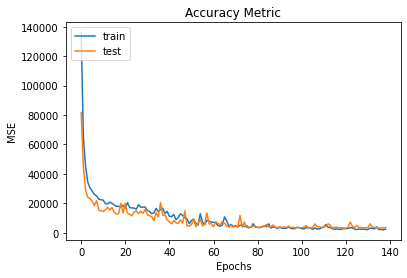

In [24]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10/10 [==============================] - 0s 19ms/step


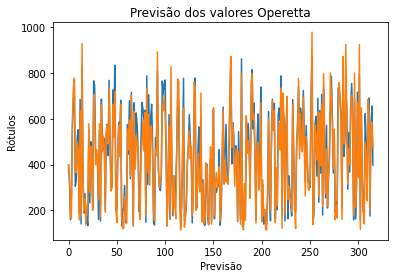

In [25]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')
plt.plot(prev)#azul - o que o modelo previu
plt.plot(y_test)#laranja - o que se sabe - observado
plt.show()

In [26]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [27]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_error(y_test, prev), 2)} Erro médio quadrático") #erro médio quadrático
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %
#print(f"{round(median(y_test, prev), 2)} mediana") #erro médio quadrático




91.26% r2_score
45.71 Erro médio absoluto
3635.91 Erro médio quadrático


In [28]:
# #salvando o modelo
data = timeProcess()[1]
modelo.save('/content/drive/MyDrive/Regressão_imagens_DOC_CNN/results_SH_SY5Y/modelo_SH_SY5Y_100_75_50_25_'+data+'.h5')